In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pickle

from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

In [ ]:
path = '/content/gdrive/Shareddrives/STATS 170A Final Project/datasets/'

In [ ]:
df_hm = pd.read_csv(path+'helpful/hurricane_marker.csv')

In [ ]:
df_hm.head()

,fips_state_code,fips_county_code,week_end,hurricane,past_hurr
0,1,1,20060107,0.0,0.0
1,1,1,20060114,0.0,0.0
2,1,1,20060121,0.0,0.0
3,1,1,20060128,0.0,0.0
4,1,1,20060204,0.0,0.0


In [ ]:
df_hm_tx = df_hm[df_hm['fips_state_code']==48]

In [ ]:
df_hm_tx = df_hm_tx[df_hm_tx['week_end']>20170000]
df_hm_tx = df_hm_tx[df_hm_tx['week_end']<20180000]

In [ ]:
df_hm_tx[df_hm_tx['hurricane'] == 1].week_end.unique()

array([20170826, 20170902, 20170909, 20170916])

In [ ]:
dftx = df_hm_tx[df_hm_tx['hurricane'] == 1].rename(columns={'fips_state_code': "State Code", "fips_county_code": "County Code", "week_end": "Week End", 'hurricane':'Hurricane occurs or not','past_hurr':'Past hurricane or not'})


In [ ]:
dftx

,State Code,County Code,Week End,Hurricane occurs or not,Past hurricane or not
1713235,48,7,20170826,1.0,0.0
1713236,48,7,20170902,1.0,0.0
1713237,48,7,20170909,1.0,0.0
1713238,48,7,20170916,1.0,0.0
1715947,48,15,20170826,1.0,0.0
...,...,...,...,...,...
1869856,48,469,20170916,1.0,0.0
1870531,48,471,20170826,1.0,0.0
1870532,48,471,20170902,1.0,0.0
1870533,48,471,20170909,1.0,0.0


In [ ]:
dftx.loc[(dftx['Hurricane occurs or not'] == 1), 'Hurricane occurs or not'] = "YES"
dftx.loc[(dftx['Hurricane occurs or not'] == 0), 'Hurricane occurs or not'] = "NO"
dftx.loc[(dftx['Past hurricane or not'] == 1), 'Past hurricane or not'] = "YES"
dftx.loc[(dftx['Past hurricane or not'] == 0), 'Past hurricane or not'] = "NO"

In [ ]:
dftx.head(10)

,State Code,County Code,Week End,Hurricane occurs or not,Past hurricane or not
1713235,48,7,20170826,YES,NO
1713236,48,7,20170902,YES,NO
1713237,48,7,20170909,YES,NO
1713238,48,7,20170916,YES,NO
1715947,48,15,20170826,YES,NO
1715948,48,15,20170902,YES,NO
1715949,48,15,20170909,YES,NO
1715950,48,15,20170916,YES,NO
1717981,48,21,20170826,YES,NO
1717982,48,21,20170902,YES,NO


In [ ]:
import pickle

In [ ]:
df_tx_2017 = pd.DataFrame()
with open(path+'Data_Frames/df_tx_2017.pkl','rb') as infile:
    df_tx_2017 = pickle.load(infile)
    

In [ ]:
len(df_tx_2017)

14097000

In [ ]:
df_tx_2017 = pd.merge(df_tx_2017, df_hm_tx, on=['fips_state_code','fips_county_code','week_end'], how='left')

In [ ]:
import seaborn as sns

In [ ]:
df_tx_2017[df_tx_2017['product_group_code']=='4505']

,fips_state_code,fips_county_code,week_end,product_code,product_group_code,product_module_code,sale,last_week_sale,last_week_sale_diff,units,last_week_units,last_week_units_diff,num_stores,hurricane,past_hurr
32500,48,1,20170121,4505_6014,4505,6014,173.95,313.69,60.80,33,50.0,1.0,5,0.0,0.0
32501,48,1,20170128,4505_6014,4505,6014,199.55,173.95,-139.74,38,33.0,-17.0,5,0.0,0.0
32502,48,1,20170204,4505_6014,4505,6014,279.92,199.55,25.60,48,38.0,5.0,6,0.0,0.0
32503,48,1,20170211,4505_6014,4505,6014,313.51,279.92,80.37,67,48.0,10.0,6,0.0,0.0
32504,48,1,20170218,4505_6014,4505,6014,410.13,313.51,33.59,68,67.0,19.0,6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14075245,48,507,20171202,4505_7885,4505,7885,0.00,0.00,0.00,0,0.0,0.0,0,0.0,0.0
14075246,48,507,20171209,4505_7885,4505,7885,0.00,0.00,0.00,0,0.0,0.0,0,0.0,0.0
14075247,48,507,20171216,4505_7885,4505,7885,0.00,0.00,0.00,0,0.0,0.0,0,0.0,0.0
14075248,48,507,20171223,4505_7885,4505,7885,0.00,0.00,0.00,0,0.0,0.0,0,0.0,0.0


In [ ]:
plt.rcParams.update({'font.size': 16})

In [ ]:
df_selected = df_tx_2017[df_tx_2017['week_end'].isin([20170826, 20170902, 20170909, 20170916])]
df_selected['log_sale'] = df_selected['sale'].apply(lambda x:np.log(x)).replace([np.inf,-np.inf],0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_selected

,fips_state_code,fips_county_code,week_end,product_code,product_group_code,product_module_code,sale,last_week_sale,last_week_sale_diff,units,last_week_units,last_week_units_diff,num_stores,hurricane,past_hurr,log_sale
31,48,1,20170826,0501_1272,0501,1272,1777.55,1300.41,-1835.20,105,79.0,-99.0,2,0.0,0.0,7.482991
32,48,1,20170902,0501_1272,0501,1272,1318.07,1777.55,477.14,73,105.0,26.0,2,0.0,0.0,7.183924
33,48,1,20170909,0501_1272,0501,1272,3576.48,1318.07,-459.48,202,73.0,-32.0,2,0.0,0.0,8.182134
34,48,1,20170916,0501_1272,0501,1272,2261.95,3576.48,2258.41,125,202.0,129.0,2,0.0,0.0,7.723983
81,48,1,20170826,0501_1274,0501,1274,124.99,110.81,-44.58,47,47.0,-8.0,7,0.0,0.0,4.828234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14096934,48,507,20170916,6018_8415,6018,8415,0.00,0.00,0.00,0,0.0,0.0,0,0.0,0.0,0.000000
14096981,48,507,20170826,9599_6073,9599,6073,0.00,0.00,0.00,0,0.0,0.0,0,0.0,0.0,0.000000
14096982,48,507,20170902,9599_6073,9599,6073,0.00,0.00,0.00,0,0.0,0.0,0,0.0,0.0,0.000000
14096983,48,507,20170909,9599_6073,9599,6073,0.00,0.00,0.00,0,0.0,0.0,0,0.0,0.0,0.000000


In [ ]:
df_selected.loc[(df_selected['hurricane'] == 1), 'hurricane'] = "Yes"
df_selected.loc[(df_selected['hurricane'] == 0), 'hurricane'] = "No"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
df_selected

,fips_state_code,fips_county_code,week_end,product_code,product_group_code,product_module_code,sale,last_week_sale,last_week_sale_diff,units,last_week_units,last_week_units_diff,num_stores,hurricane,past_hurr,log_sale
31,48,1,20170826,0501_1272,0501,1272,1777.55,1300.41,-1835.20,105,79.0,-99.0,2,No,0.0,7.482991
32,48,1,20170902,0501_1272,0501,1272,1318.07,1777.55,477.14,73,105.0,26.0,2,No,0.0,7.183924
33,48,1,20170909,0501_1272,0501,1272,3576.48,1318.07,-459.48,202,73.0,-32.0,2,No,0.0,8.182134
34,48,1,20170916,0501_1272,0501,1272,2261.95,3576.48,2258.41,125,202.0,129.0,2,No,0.0,7.723983
81,48,1,20170826,0501_1274,0501,1274,124.99,110.81,-44.58,47,47.0,-8.0,7,No,0.0,4.828234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14096934,48,507,20170916,6018_8415,6018,8415,0.00,0.00,0.00,0,0.0,0.0,0,No,0.0,0.000000
14096981,48,507,20170826,9599_6073,9599,6073,0.00,0.00,0.00,0,0.0,0.0,0,No,0.0,0.000000
14096982,48,507,20170902,9599_6073,9599,6073,0.00,0.00,0.00,0,0.0,0.0,0,No,0.0,0.000000
14096983,48,507,20170909,9599_6073,9599,6073,0.00,0.00,0.00,0,0.0,0.0,0,No,0.0,0.000000


In [ ]:
revised_df_for_boxplot = df_selected.copy()

In [ ]:

revised_df_for_boxplot['week_end'] = revised_df_for_boxplot['week_end'].apply(lambda x: (str(x)[4:6]+"-"+str(x)[6:]))
revised_df_for_boxplot['week_end']


31          08-26
32          09-02
33          09-09
34          09-16
81          08-26
            ...  
14096934    09-16
14096981    08-26
14096982    09-02
14096983    09-09
14096984    09-16
Name: week_end, Length: 1127760, dtype: object

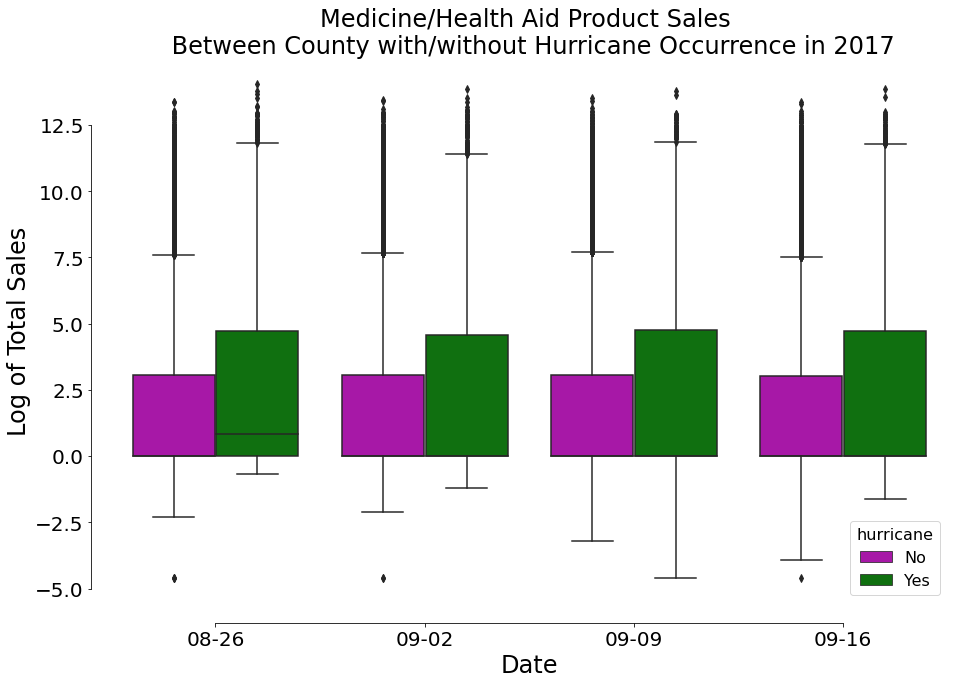

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="week_end", y="log_sale",
            hue="hurricane", palette=["m", "g"],
            data=revised_df_for_boxplot)
sns.despine(offset=20, trim=True)
plt.title("Medicine/Health Aid Product Sales \n Between County with/without Hurricane Occurrence in 2017", fontsize=24)
plt.xlabel("Date", fontsize = 24)
plt.ylabel("Log of Total Sales",fontsize = 24)

ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)

plt.show()

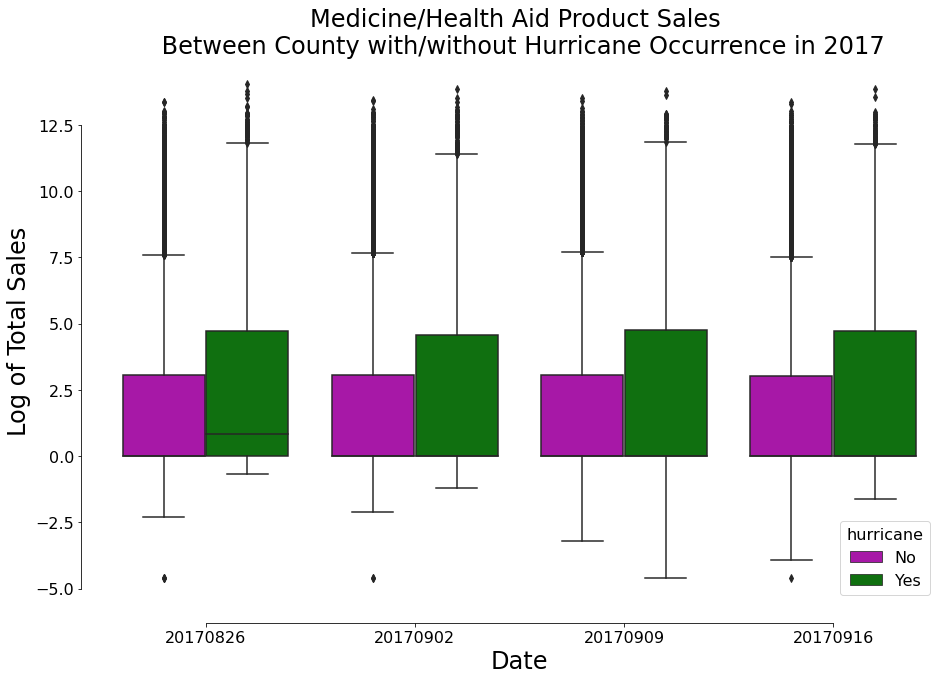

In [ ]:

fig, ax = plt.subplots(figsize=(15,10))

# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="week_end", y="log_sale",
            hue="hurricane", palette=["m", "g"],
            data=df_selected)
sns.despine(offset=20, trim=True)
plt.title("Medicine/Health Aid Product Sales \n Between County with/without Hurricane Occurrence in 2017", fontsize=24)
plt.xlabel("Date", fontsize = 24)
plt.ylabel("Log of Total Sales",fontsize = 24)


plt.show()

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
corpus = [
'This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?',
]

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:
vectorizer.vocabulary_

{'and': 0,
 'document': 1,
 'first': 2,
 'is': 3,
 'one': 4,
 'second': 5,
 'the': 6,
 'third': 7,
 'this': 8}

In [ ]:
vectorizer.idf_

array([1.91629073, 1.22314355, 1.51082562, 1.        , 1.91629073,
       1.91629073, 1.        , 1.91629073, 1.        ])

In [ ]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']